In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Aufgabe 1a



Daten einlesen

In [4]:
train = pd.read_csv('train.csv')

Korrelation der Attribute zueinander berechnen 

In [5]:
train_corr = train.corr(method='pearson', min_periods=1)

Korrelationen sortieren nach Größe in Abhängigkeit vom SalePrice

Korrelation zu SalePrice am Größten bei OverallQual (0.790982), GrLivArea (0.708624), GarageCars (0.640409)

In [21]:
#train_corr.sort('SalePrice')


Scatter Plots der Korrelationen




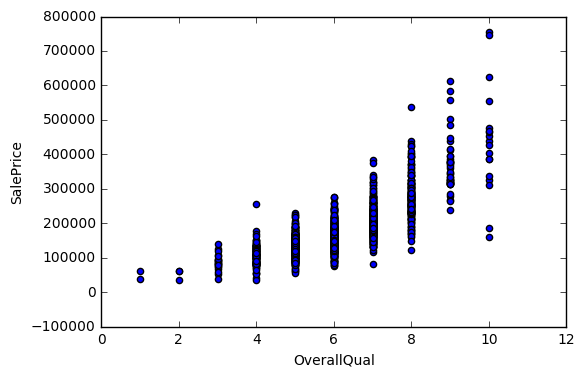

In [17]:
plt.scatter(x=train['OverallQual'], y= train['SalePrice'])

plt.xlabel('OverallQual') 
plt.ylabel('SalePrice') 

plt.savefig('Corr_OverallQual.pdf')


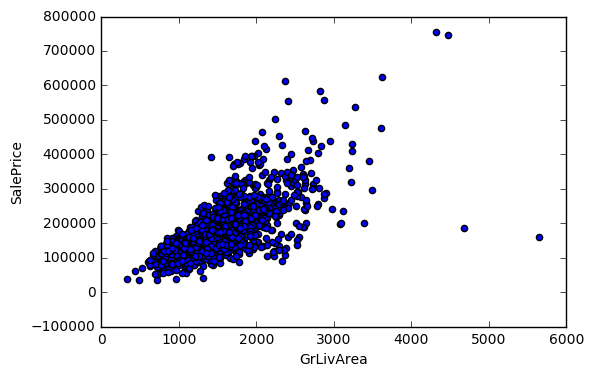

In [18]:
plt.scatter(x= train['GrLivArea'], y=train['SalePrice'])

plt.xlabel('GrLivArea') 
plt.ylabel('SalePrice') 

plt.savefig('Corr_GrLivArea.pdf')


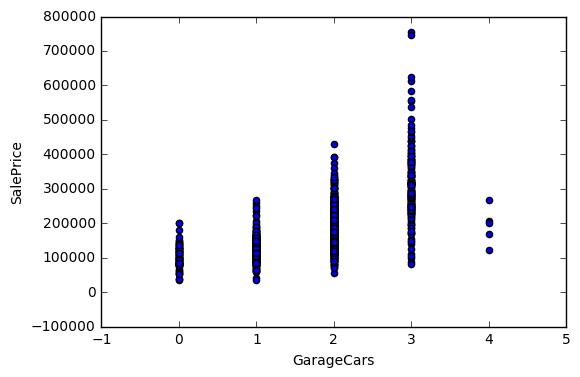

In [19]:
plt.scatter(x=train['GarageCars'], y=train['SalePrice'])

plt.xlabel('GarageCars') 
plt.ylabel('SalePrice') 

plt.savefig('Corr_GarageCars.pdf')

Aufgabe 1b: lineare Regression zwischen dem Attribut mit der höchsten Kor-
relation und dem Attribut SalePrice

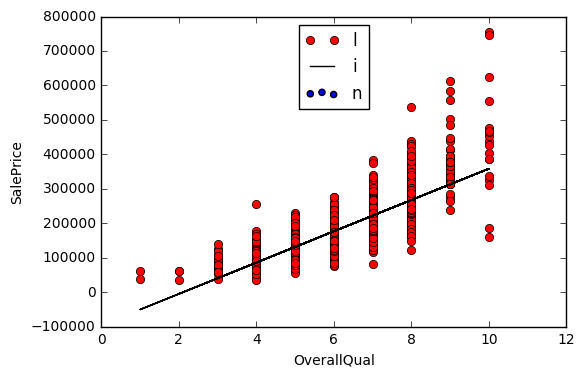

In [36]:
plt.scatter(x=train['OverallQual'], y= train['SalePrice'])
x=train['OverallQual']
y= train['SalePrice']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice') 
plt.plot(x,y, 'ro', x, fit_fn(x), '-k')
plt.legend(('lineare Regression),loc='upper center') # Legende
plt.savefig('linreg_OverallQual')

Aufgabe 1c

Darstellung des relativen Abstands zwischen den geschätzten Verkaufspreisen aus
der linearen Regression in Teil b) und den wahren Verkaufspreisen in einem His-
togramm

In [24]:
def f(x):
    return 4.544e+04 * x - 9.621e+04

In [25]:
arr = []
for x  in (train['OverallQual']):
    arr.append( 4.544e+04*x-9.621e+04)

In [26]:
dist = []
for i in range(len(train.SalePrice)):
    dist.append((train.SalePrice[i] - arr[i])/train.SalePrice[i])


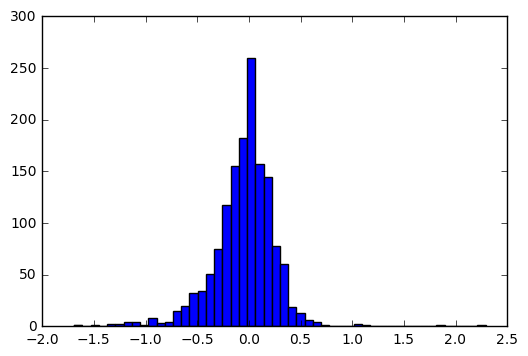

In [28]:
plt.hist(dist, bins=50)
plt.savefig('rel_Abstand_hist.pdf')